### 08/16/2020

In [73]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import scikitplot
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

##### A) Assemble a dataframe with one row per customer and the following columns:

##### * customer_id * gender * most_recent_order_date * order_count (number of orders placed by this customer)

##### Sort the dataframe by customer_id ascending and display the first 10 rows.

In [57]:
data  = pd.read_csv("screening_exercise_orders_v201810.csv")

In [58]:
data

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.50,1
1,1001,0,2017-01-01 00:29:56,338.00,1
2,1002,1,2017-01-01 01:30:31,733.00,1
3,1003,1,2017-01-01 01:34:22,772.00,1
4,1004,0,2017-01-01 03:11:54,508.00,1
...,...,...,...,...,...
13466,9810,1,2017-12-31 22:16:20,794.44,0
13467,9811,1,2017-12-31 22:24:06,148.60,0
13468,9812,0,2017-12-31 23:01:10,153.00,1
13469,9813,0,2017-12-31 23:11:02,534.00,1


In [59]:
most_recent_order_date = data.groupby(["customer_id","gender"], sort=False)["date"].max()

In [60]:
order_count = data["customer_id"].value_counts()

In [61]:
data.drop("predicted_gender", axis=1, inplace=True)

In [62]:
data.columns = ["Customer_id", "Gender", "Most_recent_order_date", "Order_count"]

In [63]:
data["Most_recent_order_date"] = pd.to_datetime(data["Most_recent_order_date"])

In [64]:
data.sort_values(["Customer_id", "Most_recent_order_date"], inplace=True)

In [65]:
order_count = order_count.reset_index()

In [66]:
order_count.columns = (["Customer_id", "count"])

In [68]:
data.drop_duplicates("Customer_id", keep="last", inplace=True)

In [69]:
data.reset_index(inplace=True, drop=True)

In [70]:
data['Order_count'] = order_count["count"]

In [72]:
data.head(10)

,Customer_id,Gender,Most_recent_order_date,Order_count
0,1000,0,2017-01-01 00:11:31,25
1,1001,0,2017-01-01 00:29:56,16
2,1002,1,2017-02-19 21:35:31,16
3,1003,1,2017-04-26 02:37:20,16
4,1004,0,2017-01-01 03:11:54,14
5,1005,1,2017-12-16 01:39:27,14
6,1006,1,2017-05-09 15:27:20,13
7,1007,0,2017-01-01 15:59:50,12
8,1008,0,2017-12-17 05:47:48,12
9,1009,1,2017-01-01 19:27:17,12


##### B) Plot the count of orders per week for the store.

In [92]:
data  = pd.read_csv("screening_exercise_orders_v201810.csv")

In [93]:
data.head()

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.5,1
1,1001,0,2017-01-01 00:29:56,338.0,1
2,1002,1,2017-01-01 01:30:31,733.0,1
3,1003,1,2017-01-01 01:34:22,772.0,1
4,1004,0,2017-01-01 03:11:54,508.0,1


In [94]:
df = data.loc[:, ["value"]]

In [95]:
df["week"] = pd.to_datetime(data["date"]).dt.week

In [96]:
df2 = (df.groupby("week").sum().reset_index())

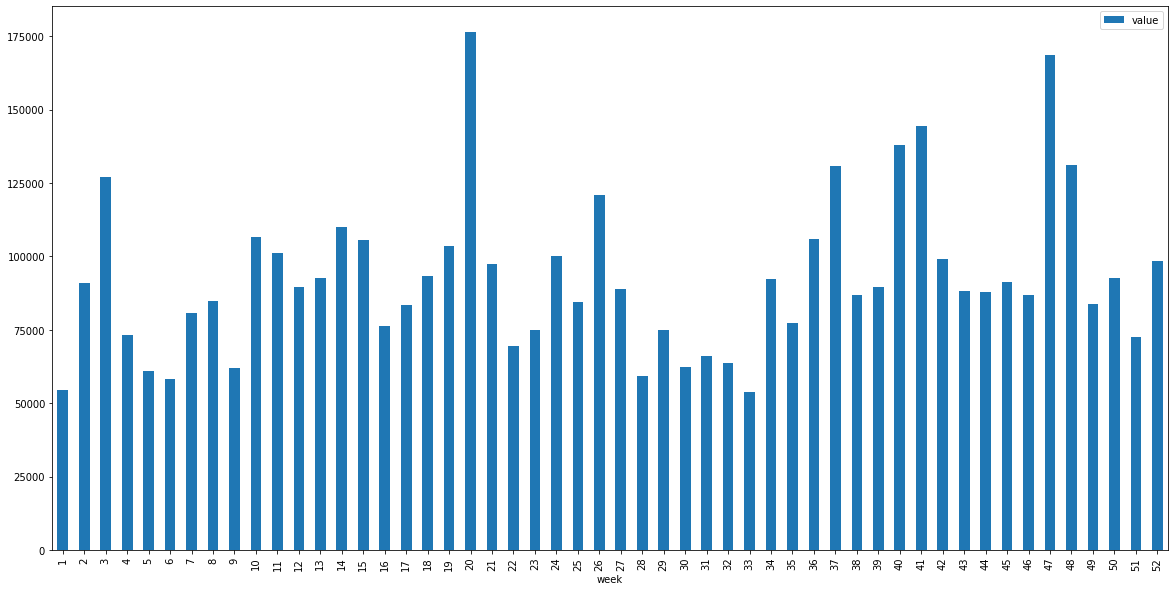

In [103]:
df2.plot.bar(x="week", y="value", figsize=(20,10))

##### C) Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant? Justify your choice of method.

In [12]:
data  = pd.read_csv("screening_exercise_orders_v201810.csv")

In [17]:
gender0_sampleMean = data.groupby("gender")["value"].mean()[0]

In [18]:
gender1_sampleMean = data.groupby("gender")["value"].mean()[1]

In [19]:
gender0_sampleMean, gender1_sampleMean

(363.89000591803506, 350.70836114422)

In [20]:
gender0_sampleVar = data.groupby("gender")["value"].var(ddof=1)[0]

In [21]:
gender1_sampleVar = data.groupby("gender")["value"].var(ddof=1)[1]

In [22]:
gender0_sampleVar, gender1_sampleVar

(157238.59072707873, 142509.82682491044)

In [30]:
gender0_sampleSize = data["gender"].value_counts()[0]

In [31]:
gender1_sampleSize = data["gender"].value_counts()[1]

In [32]:
gender0_sampleSize, gender1_sampleSize

(6759, 6712)

In [33]:
t = (gender0_sampleMean - gender1_sampleMean) / np.sqrt(gender0_sampleVar/gender0_sampleSize + gender1_sampleVar/gender1_sampleSize)

In [34]:
t

1.9761079335767466

In [35]:
dof = gender0_sampleSize + gender1_sampleSize - 2
dof

13469

When α = 0.05, v = 13469, the critical value t1-α/2,ν = 1.96014.

Since t = 1.976 is larger than the critical value = 1.96, we have enough evidence to reject the null hypothesis and conclude that the mean order value for gender 0 and for gender 1 are different at the 0.05 significance level. 

##### D) Generate a confusion matrix for the gender predictions of customers in this dataset. You can assume that there is only one gender prediction for each customer. What does the confusion matrix tell you about the quality of the predictions?

In [3]:
data  = pd.read_csv("screening_exercise_orders_v201810.csv")

In [4]:
y_pred = data["predicted_gender"]

In [5]:
y_true = data["gender"]

In [6]:
confusion_matrix(y_true, y_pred, labels=[0, 1])

array([[3349, 3410],
       [1463, 5249]], dtype=int64)

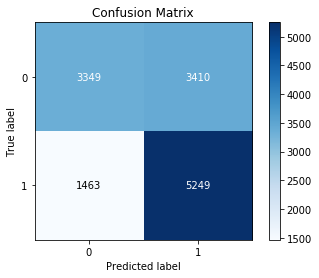

In [8]:
scikitplot.metrics.plot_confusion_matrix(y_true, y_pred)

In [11]:
accuracy_score(y_true, y_pred)

0.6382599658525722

The accuracy score is 63.8%. From the confusion matrix, we can see that the Fasle Positive(Type 1) is very high. A lot of gender 0 customer are being predicted to be gender 1. Not many gender 1 customers are being predicted to be gender 0. The ratio of gender 0 to gender 1 is roughly 1:1; however, the prediction model tilt to predict the gender to be 1. The quality of the prediction is not so good. 